In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GIS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


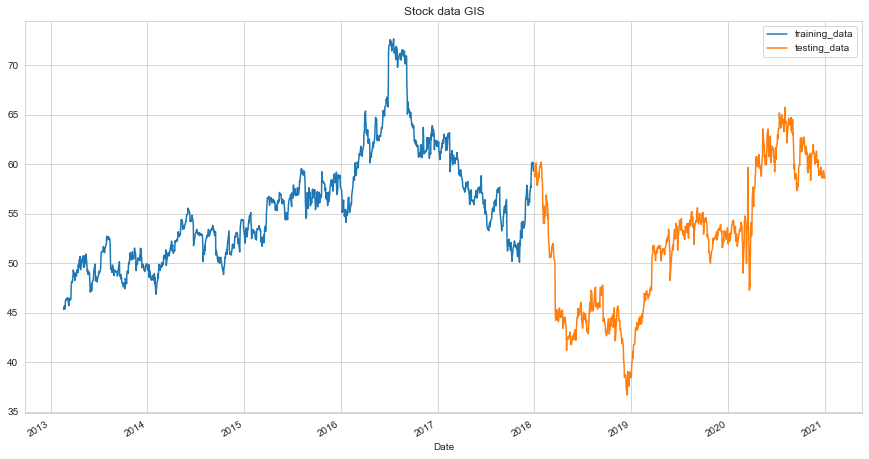

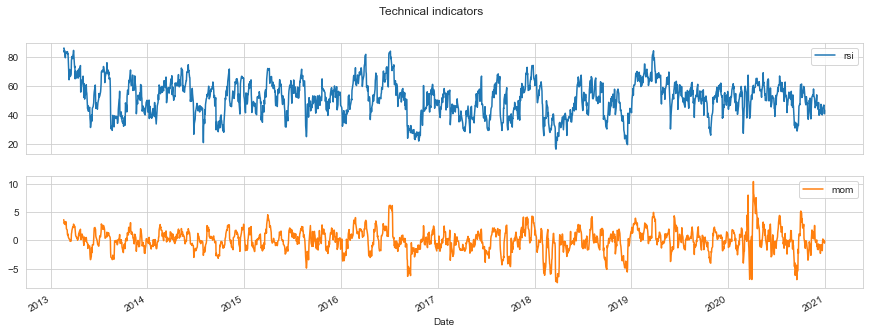

In [2]:
stock_name = 'gis'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1170.53, duration: 0:00:00.435098
episode: 2/2000, episode end value: 1167.98, duration: 0:00:00.376087
episode: 3/2000, episode end value: 1117.28, duration: 0:00:00.356076
episode: 4/2000, episode end value: 1136.47, duration: 0:00:00.325074
episode: 5/2000, episode end value: 1100.98, duration: 0:00:00.359080
episode: 6/2000, episode end value: 1143.13, duration: 0:00:00.407094
episode: 7/2000, episode end value: 1124.99, duration: 0:00:00.348076
episode: 8/2000, episode end value: 1162.74, duration: 0:00:00.330075
episode: 9/2000, episode end value: 1161.30, duration: 0:00:00.338072
episode: 10/2000, episode end value: 1155.66, duration: 0:00:00.329073
episode: 11/2000, episode end value: 1161.09, duration: 0:00:00.305069
episode: 12/2000, episode end value: 1204.25, duration: 0:00:00.304069
episode: 13/2000, episode end value: 1164.67, duration: 0:00:00.317073
episode: 14/2000, episode end value: 1162.85, duration: 0:00:00.341073
episode: 15/200

episode: 117/2000, episode end value: 1185.13, duration: 0:00:00.501112
episode: 118/2000, episode end value: 1189.29, duration: 0:00:00.440098
episode: 119/2000, episode end value: 1165.88, duration: 0:00:00.437094
episode: 120/2000, episode end value: 1172.79, duration: 0:00:00.482108
episode: 121/2000, episode end value: 1200.66, duration: 0:00:00.482107
episode: 122/2000, episode end value: 1153.55, duration: 0:00:00.389091
episode: 123/2000, episode end value: 1170.91, duration: 0:00:00.527122
episode: 124/2000, episode end value: 1167.43, duration: 0:00:00.544120
episode: 125/2000, episode end value: 1166.62, duration: 0:00:00.445101
episode: 126/2000, episode end value: 1181.20, duration: 0:00:00.448099
episode: 127/2000, episode end value: 1188.67, duration: 0:00:00.468110
episode: 128/2000, episode end value: 1167.30, duration: 0:00:00.472103
episode: 129/2000, episode end value: 1169.14, duration: 0:00:00.442097
episode: 130/2000, episode end value: 1175.87, duration: 0:00:00

episode: 231/2000, episode end value: 1165.74, duration: 0:00:00.526118
episode: 232/2000, episode end value: 1164.96, duration: 0:00:00.599136
episode: 233/2000, episode end value: 1183.02, duration: 0:00:00.531120
episode: 234/2000, episode end value: 1151.48, duration: 0:00:00.536121
episode: 235/2000, episode end value: 1164.72, duration: 0:00:00.609145
episode: 236/2000, episode end value: 1169.17, duration: 0:00:00.613136
episode: 237/2000, episode end value: 1177.57, duration: 0:00:00.587132
episode: 238/2000, episode end value: 1185.36, duration: 0:00:00.592139
episode: 239/2000, episode end value: 1168.00, duration: 0:00:00.476100
episode: 240/2000, episode end value: 1166.87, duration: 0:00:00.514114
episode: 241/2000, episode end value: 1181.84, duration: 0:00:00.599137
episode: 242/2000, episode end value: 1165.24, duration: 0:00:00.513114
episode: 243/2000, episode end value: 1169.49, duration: 0:00:00.568126
episode: 244/2000, episode end value: 1178.23, duration: 0:00:00

episode: 345/2000, episode end value: 1166.84, duration: 0:00:00.461105
episode: 346/2000, episode end value: 1181.91, duration: 0:00:00.480108
episode: 347/2000, episode end value: 1154.74, duration: 0:00:00.512115
episode: 348/2000, episode end value: 1173.84, duration: 0:00:00.471103
episode: 349/2000, episode end value: 1164.90, duration: 0:00:00.449105
episode: 350/2000, episode end value: 1179.65, duration: 0:00:00.530117
episode: 351/2000, episode end value: 1166.70, duration: 0:00:00.532118
episode: 352/2000, episode end value: 1167.24, duration: 0:00:00.485108
episode: 353/2000, episode end value: 1169.04, duration: 0:00:00.510115
episode: 354/2000, episode end value: 1170.76, duration: 0:00:00.504111
episode: 355/2000, episode end value: 1164.83, duration: 0:00:00.538123
episode: 356/2000, episode end value: 1168.29, duration: 0:00:00.505118
episode: 357/2000, episode end value: 1169.67, duration: 0:00:00.429093
episode: 358/2000, episode end value: 1176.26, duration: 0:00:00

episode: 459/2000, episode end value: 1173.19, duration: 0:00:00.481110
episode: 460/2000, episode end value: 1167.42, duration: 0:00:00.494111
episode: 461/2000, episode end value: 1167.38, duration: 0:00:00.529121
episode: 462/2000, episode end value: 1161.31, duration: 0:00:00.548122
episode: 463/2000, episode end value: 1182.16, duration: 0:00:00.516114
episode: 464/2000, episode end value: 1161.71, duration: 0:00:00.502116
episode: 465/2000, episode end value: 1186.61, duration: 0:00:00.499117
episode: 466/2000, episode end value: 1152.81, duration: 0:00:00.488111
episode: 467/2000, episode end value: 1160.38, duration: 0:00:00.452099
episode: 468/2000, episode end value: 1167.70, duration: 0:00:00.427094
episode: 469/2000, episode end value: 1169.25, duration: 0:00:00.533122
episode: 470/2000, episode end value: 1168.26, duration: 0:00:00.527120
episode: 471/2000, episode end value: 1170.87, duration: 0:00:00.467110
episode: 472/2000, episode end value: 1169.25, duration: 0:00:00

episode: 573/2000, episode end value: 1151.13, duration: 0:00:00.487114
episode: 574/2000, episode end value: 1157.74, duration: 0:00:00.487108
episode: 575/2000, episode end value: 1144.57, duration: 0:00:00.500109
episode: 576/2000, episode end value: 1160.09, duration: 0:00:00.521114
episode: 577/2000, episode end value: 1150.01, duration: 0:00:00.456100
episode: 578/2000, episode end value: 1152.05, duration: 0:00:00.508112
episode: 579/2000, episode end value: 1161.03, duration: 0:00:00.467106
episode: 580/2000, episode end value: 1168.79, duration: 0:00:00.453106
episode: 581/2000, episode end value: 1166.58, duration: 0:00:00.541121
episode: 582/2000, episode end value: 1180.52, duration: 0:00:00.494114
episode: 583/2000, episode end value: 1161.57, duration: 0:00:00.450101
episode: 584/2000, episode end value: 1167.72, duration: 0:00:00.503111
episode: 585/2000, episode end value: 1168.86, duration: 0:00:00.536122
episode: 586/2000, episode end value: 1166.85, duration: 0:00:00

episode: 687/2000, episode end value: 1160.32, duration: 0:00:00.477114
episode: 688/2000, episode end value: 1167.40, duration: 0:00:00.455105
episode: 689/2000, episode end value: 1167.11, duration: 0:00:00.462103
episode: 690/2000, episode end value: 1168.60, duration: 0:00:00.498110
episode: 691/2000, episode end value: 1167.23, duration: 0:00:00.552127
episode: 692/2000, episode end value: 1166.38, duration: 0:00:00.446103
episode: 693/2000, episode end value: 1166.58, duration: 0:00:00.511113
episode: 694/2000, episode end value: 1166.63, duration: 0:00:00.475105
episode: 695/2000, episode end value: 1185.63, duration: 0:00:00.558119
episode: 696/2000, episode end value: 1152.82, duration: 0:00:00.447099
episode: 697/2000, episode end value: 1200.75, duration: 0:00:00.474109
episode: 698/2000, episode end value: 1157.37, duration: 0:00:00.471104
episode: 699/2000, episode end value: 1162.98, duration: 0:00:00.474108
episode: 700/2000, episode end value: 1148.12, duration: 0:00:00

episode: 801/2000, episode end value: 1168.31, duration: 0:00:00.524120
episode: 802/2000, episode end value: 1184.72, duration: 0:00:00.625141
episode: 803/2000, episode end value: 1150.09, duration: 0:00:00.470105
episode: 804/2000, episode end value: 1151.51, duration: 0:00:00.384084
episode: 805/2000, episode end value: 1149.89, duration: 0:00:00.441106
episode: 806/2000, episode end value: 1203.03, duration: 0:00:00.521111
episode: 807/2000, episode end value: 1146.54, duration: 0:00:00.417098
episode: 808/2000, episode end value: 1148.60, duration: 0:00:00.428096
episode: 809/2000, episode end value: 1153.89, duration: 0:00:00.426093
episode: 810/2000, episode end value: 1149.45, duration: 0:00:00.454103
episode: 811/2000, episode end value: 1155.07, duration: 0:00:00.456108
episode: 812/2000, episode end value: 1198.31, duration: 0:00:00.545122
episode: 813/2000, episode end value: 1171.45, duration: 0:00:00.521117
episode: 814/2000, episode end value: 1152.90, duration: 0:00:00

episode: 915/2000, episode end value: 1184.18, duration: 0:00:00.493116
episode: 916/2000, episode end value: 1185.54, duration: 0:00:00.474107
episode: 917/2000, episode end value: 1169.85, duration: 0:00:00.558126
episode: 918/2000, episode end value: 1186.89, duration: 0:00:00.535121
episode: 919/2000, episode end value: 1167.44, duration: 0:00:00.449104
episode: 920/2000, episode end value: 1168.24, duration: 0:00:00.509110
episode: 921/2000, episode end value: 1180.22, duration: 0:00:00.477109
episode: 922/2000, episode end value: 1167.29, duration: 0:00:00.476107
episode: 923/2000, episode end value: 1168.12, duration: 0:00:00.490112
episode: 924/2000, episode end value: 1168.14, duration: 0:00:00.473103
episode: 925/2000, episode end value: 1167.79, duration: 0:00:00.530125
episode: 926/2000, episode end value: 1183.23, duration: 0:00:00.454099
episode: 927/2000, episode end value: 1163.43, duration: 0:00:00.469110
episode: 928/2000, episode end value: 1168.97, duration: 0:00:00

episode: 1029/2000, episode end value: 1145.75, duration: 0:00:00.421095
episode: 1030/2000, episode end value: 1156.98, duration: 0:00:00.497115
episode: 1031/2000, episode end value: 1156.43, duration: 0:00:00.445094
episode: 1032/2000, episode end value: 1182.18, duration: 0:00:00.573130
episode: 1033/2000, episode end value: 1178.47, duration: 0:00:00.545123
episode: 1034/2000, episode end value: 1179.72, duration: 0:00:00.516116
episode: 1035/2000, episode end value: 1179.87, duration: 0:00:00.489109
episode: 1036/2000, episode end value: 1178.71, duration: 0:00:00.582127
episode: 1037/2000, episode end value: 1181.73, duration: 0:00:00.527121
episode: 1038/2000, episode end value: 1161.05, duration: 0:00:00.505112
episode: 1039/2000, episode end value: 1182.54, duration: 0:00:00.565125
episode: 1040/2000, episode end value: 1166.83, duration: 0:00:00.539119
episode: 1041/2000, episode end value: 1170.86, duration: 0:00:00.484111
episode: 1042/2000, episode end value: 1187.68, dur

episode: 1142/2000, episode end value: 1168.35, duration: 0:00:00.532118
episode: 1143/2000, episode end value: 1178.79, duration: 0:00:00.497114
episode: 1144/2000, episode end value: 1167.71, duration: 0:00:00.462102
episode: 1145/2000, episode end value: 1169.02, duration: 0:00:00.527118
episode: 1146/2000, episode end value: 1167.90, duration: 0:00:00.496114
episode: 1147/2000, episode end value: 1170.88, duration: 0:00:00.492105
episode: 1148/2000, episode end value: 1186.34, duration: 0:00:00.496110
episode: 1149/2000, episode end value: 1188.62, duration: 0:00:00.485109
episode: 1150/2000, episode end value: 1157.51, duration: 0:00:00.403091
episode: 1151/2000, episode end value: 1200.05, duration: 0:00:00.484109
episode: 1152/2000, episode end value: 1188.20, duration: 0:00:00.392087
episode: 1153/2000, episode end value: 1150.07, duration: 0:00:00.459104
episode: 1154/2000, episode end value: 1145.64, duration: 0:00:00.419100
episode: 1155/2000, episode end value: 1148.67, dur

episode: 1255/2000, episode end value: 1151.56, duration: 0:00:00.446102
episode: 1256/2000, episode end value: 1153.62, duration: 0:00:00.465103
episode: 1257/2000, episode end value: 1159.97, duration: 0:00:00.466107
episode: 1258/2000, episode end value: 1187.22, duration: 0:00:00.486104
episode: 1259/2000, episode end value: 1152.33, duration: 0:00:00.505113
episode: 1260/2000, episode end value: 1164.67, duration: 0:00:00.499113
episode: 1261/2000, episode end value: 1178.29, duration: 0:00:00.436096
episode: 1262/2000, episode end value: 1180.77, duration: 0:00:00.533117
episode: 1263/2000, episode end value: 1178.71, duration: 0:00:00.574128
episode: 1264/2000, episode end value: 1154.98, duration: 0:00:00.451100
episode: 1265/2000, episode end value: 1173.80, duration: 0:00:00.459105
episode: 1266/2000, episode end value: 1173.34, duration: 0:00:00.496112
episode: 1267/2000, episode end value: 1166.71, duration: 0:00:00.559126
episode: 1268/2000, episode end value: 1171.04, dur

episode: 1368/2000, episode end value: 1149.67, duration: 0:00:00.349084
episode: 1369/2000, episode end value: 1151.31, duration: 0:00:00.409092
episode: 1370/2000, episode end value: 1157.16, duration: 0:00:00.422096
episode: 1371/2000, episode end value: 1159.01, duration: 0:00:00.423100
episode: 1372/2000, episode end value: 1179.46, duration: 0:00:00.515117
episode: 1373/2000, episode end value: 1180.19, duration: 0:00:00.534119
episode: 1374/2000, episode end value: 1178.98, duration: 0:00:00.468108
episode: 1375/2000, episode end value: 1181.13, duration: 0:00:00.527124
episode: 1376/2000, episode end value: 1182.17, duration: 0:00:00.515112
episode: 1377/2000, episode end value: 1158.80, duration: 0:00:00.501113
episode: 1378/2000, episode end value: 1165.98, duration: 0:00:00.462101
episode: 1379/2000, episode end value: 1169.87, duration: 0:00:00.515113
episode: 1380/2000, episode end value: 1167.20, duration: 0:00:00.469103
episode: 1381/2000, episode end value: 1167.37, dur

episode: 1481/2000, episode end value: 1167.59, duration: 0:00:00.464104
episode: 1482/2000, episode end value: 1168.80, duration: 0:00:00.470108
episode: 1483/2000, episode end value: 1168.09, duration: 0:00:00.439096
episode: 1484/2000, episode end value: 1184.12, duration: 0:00:00.390086
episode: 1485/2000, episode end value: 1186.52, duration: 0:00:00.457106
episode: 1486/2000, episode end value: 1188.05, duration: 0:00:00.427099
episode: 1487/2000, episode end value: 1190.88, duration: 0:00:00.439094
episode: 1488/2000, episode end value: 1154.58, duration: 0:00:00.354078
episode: 1489/2000, episode end value: 1168.83, duration: 0:00:00.466111
episode: 1490/2000, episode end value: 1167.16, duration: 0:00:00.438098
episode: 1491/2000, episode end value: 1189.93, duration: 0:00:00.425096
episode: 1492/2000, episode end value: 1160.27, duration: 0:00:00.385092
episode: 1493/2000, episode end value: 1163.53, duration: 0:00:00.458100
episode: 1494/2000, episode end value: 1169.54, dur

episode: 1594/2000, episode end value: 1202.85, duration: 0:00:00.390089
episode: 1595/2000, episode end value: 1146.77, duration: 0:00:00.331076
episode: 1596/2000, episode end value: 1151.34, duration: 0:00:00.363080
episode: 1597/2000, episode end value: 1161.11, duration: 0:00:00.410087
episode: 1598/2000, episode end value: 1151.28, duration: 0:00:00.337074
episode: 1599/2000, episode end value: 1150.50, duration: 0:00:00.342077
episode: 1600/2000, episode end value: 1150.40, duration: 0:00:00.341081
episode: 1601/2000, episode end value: 1155.61, duration: 0:00:00.347076
episode: 1602/2000, episode end value: 1159.91, duration: 0:00:00.348078
episode: 1603/2000, episode end value: 1154.24, duration: 0:00:00.328077
episode: 1604/2000, episode end value: 1171.13, duration: 0:00:00.341073
episode: 1605/2000, episode end value: 1179.04, duration: 0:00:00.348080
episode: 1606/2000, episode end value: 1160.42, duration: 0:00:00.361081
episode: 1607/2000, episode end value: 1167.89, dur

episode: 1707/2000, episode end value: 1168.08, duration: 0:00:00.304068
episode: 1708/2000, episode end value: 1182.01, duration: 0:00:00.317072
episode: 1709/2000, episode end value: 1181.45, duration: 0:00:00.301068
episode: 1710/2000, episode end value: 1182.47, duration: 0:00:00.317067
episode: 1711/2000, episode end value: 1168.00, duration: 0:00:00.318072
episode: 1712/2000, episode end value: 1167.64, duration: 0:00:00.320071
episode: 1713/2000, episode end value: 1168.25, duration: 0:00:00.306061
episode: 1714/2000, episode end value: 1164.33, duration: 0:00:00.279061
episode: 1715/2000, episode end value: 1167.14, duration: 0:00:00.294068
episode: 1716/2000, episode end value: 1184.20, duration: 0:00:00.316069
episode: 1717/2000, episode end value: 1159.16, duration: 0:00:00.304070
episode: 1718/2000, episode end value: 1169.47, duration: 0:00:00.308087
episode: 1719/2000, episode end value: 1167.38, duration: 0:00:00.287059
episode: 1720/2000, episode end value: 1168.11, dur

episode: 1820/2000, episode end value: 1172.58, duration: 0:00:00.245037
episode: 1821/2000, episode end value: 1179.17, duration: 0:00:00.231050
episode: 1822/2000, episode end value: 1173.55, duration: 0:00:00.233061
episode: 1823/2000, episode end value: 1167.55, duration: 0:00:00.235058
episode: 1824/2000, episode end value: 1167.52, duration: 0:00:00.224061
episode: 1825/2000, episode end value: 1183.05, duration: 0:00:00.233051
episode: 1826/2000, episode end value: 1163.33, duration: 0:00:00.238035
episode: 1827/2000, episode end value: 1194.45, duration: 0:00:00.225064
episode: 1828/2000, episode end value: 1195.70, duration: 0:00:00.237053
episode: 1829/2000, episode end value: 1156.25, duration: 0:00:00.232056
episode: 1830/2000, episode end value: 1164.02, duration: 0:00:00.235047
episode: 1831/2000, episode end value: 1166.34, duration: 0:00:00.254053
episode: 1832/2000, episode end value: 1167.31, duration: 0:00:00.237053
episode: 1833/2000, episode end value: 1169.29, dur

episode: 1933/2000, episode end value: 1197.29, duration: 0:00:00.216055
episode: 1934/2000, episode end value: 1151.24, duration: 0:00:00.209047
episode: 1935/2000, episode end value: 1150.73, duration: 0:00:00.216033
episode: 1936/2000, episode end value: 1201.43, duration: 0:00:00.218063
episode: 1937/2000, episode end value: 1141.22, duration: 0:00:00.209053
episode: 1938/2000, episode end value: 1203.87, duration: 0:00:00.207029
episode: 1939/2000, episode end value: 1148.01, duration: 0:00:00.209066
episode: 1940/2000, episode end value: 1159.18, duration: 0:00:00.202052
episode: 1941/2000, episode end value: 1158.98, duration: 0:00:00.198047
episode: 1942/2000, episode end value: 1154.07, duration: 0:00:00.207045
episode: 1943/2000, episode end value: 1149.89, duration: 0:00:00.210053
episode: 1944/2000, episode end value: 1148.50, duration: 0:00:00.220056
episode: 1945/2000, episode end value: 1171.19, duration: 0:00:00.216041
episode: 1946/2000, episode end value: 1160.73, dur

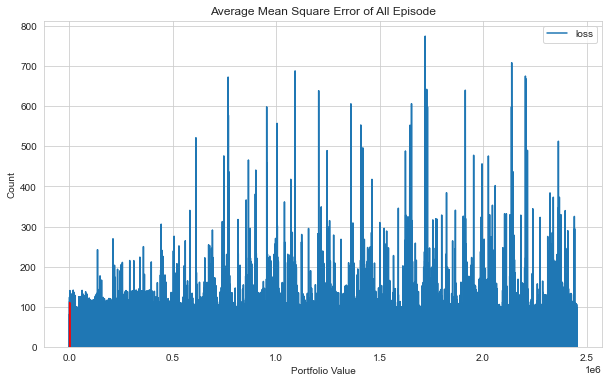

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

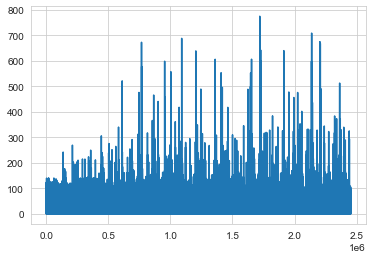

In [5]:
plt.plot(agent.model.losses)

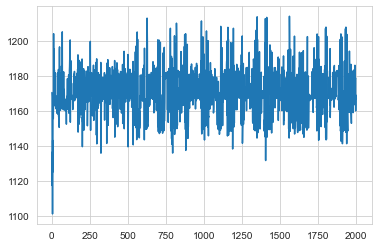

In [6]:
plt.plot(portfolio_value)

episode end value: 1134.79, duration: 0:00:00.083019
Sell: 294 times, Buy: 221 times


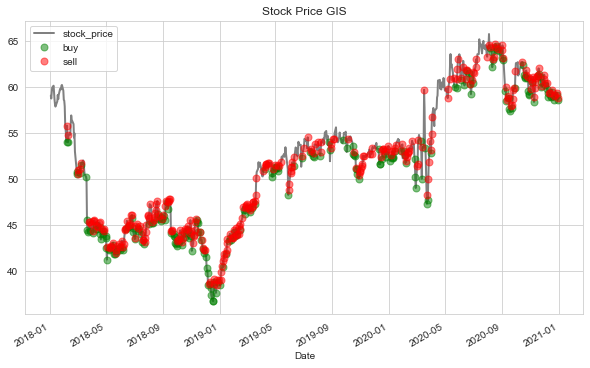

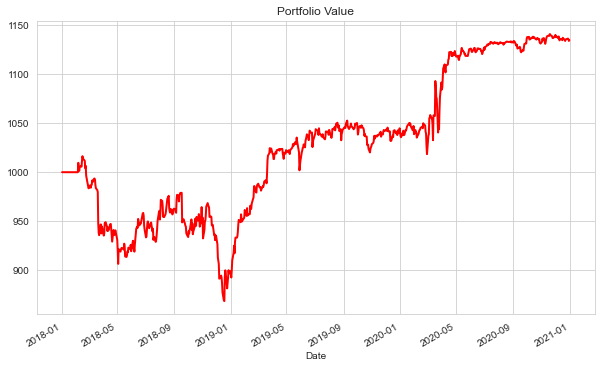

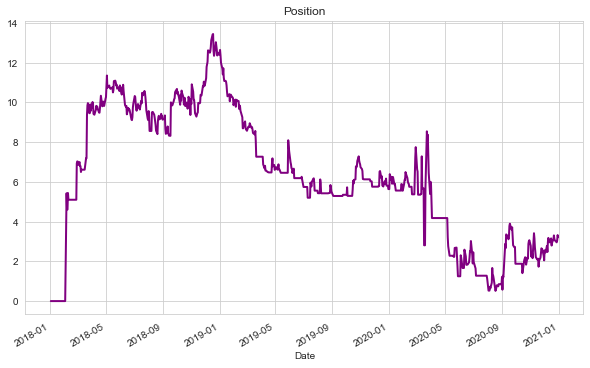

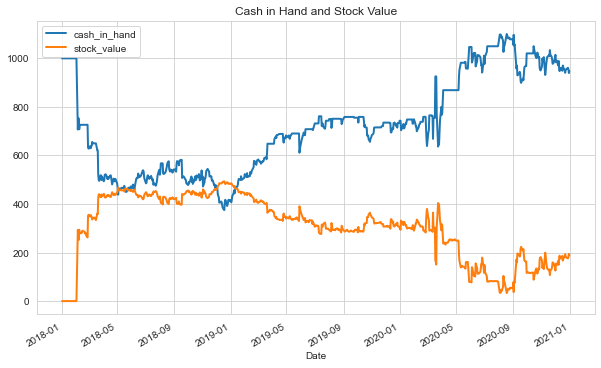

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GIS
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.31 %
Volatility: 0.0875
shape ratio: 0.3665
Maximun drawdown: -14.56 %
Calmar ratio: 0.2957
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -0.14 %
Volatility (benchmark): 0.2577
shape ratio: -0.0480
Maximun drawdown: -39.04 %
Calmar ratio (benchmark): -0.0035


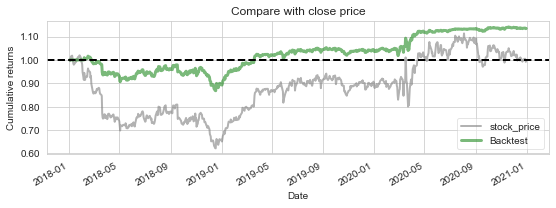

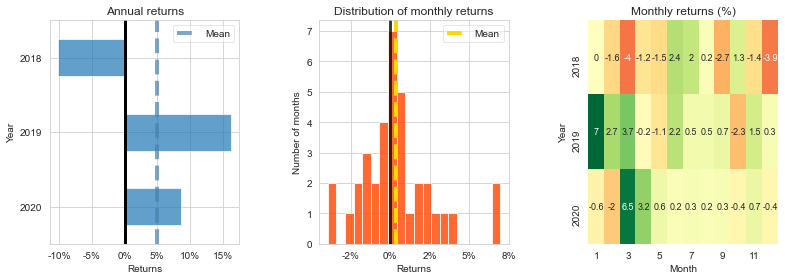

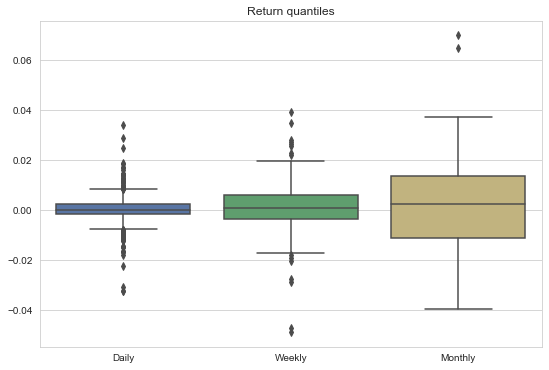

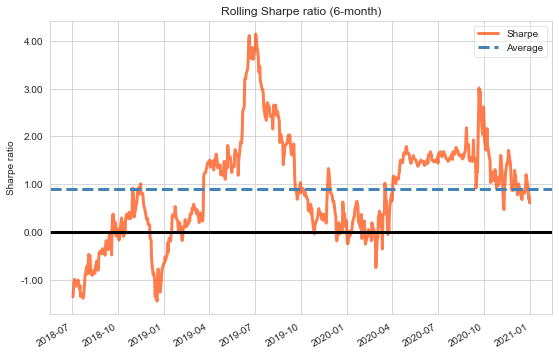

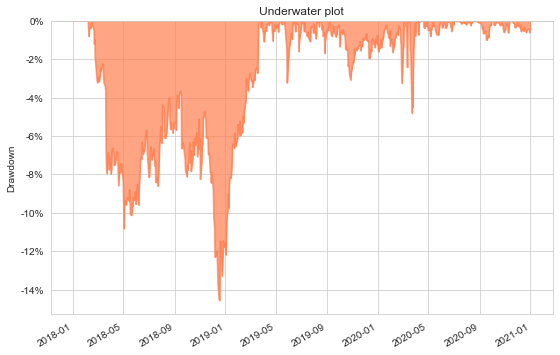

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')